## Easy to debug, Example

In [ ]:

import torch
from IPython.core.debugger import set_trace

def f(x):
    res = x + x
    set_trace()
    res = res *10
    res = 10/res
    return res

x = 10

f(x)
    

# Example of network

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from collections import OrderedDict

layers = OrderedDict([
    ('conv1', nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5)),
    ('relu', nn.ReLU()),
    ('conv2', nn.Conv2d(20,64,5)),
    ('relu2', nn.ReLU())
])
model = nn.Sequential(layers)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
net

### Versions

In [4]:
import torch
torch.__version__

'0.4.1'

In [5]:
import torchvision
torchvision.__version__

'0.2.1'

# Basic of Pytorch

In [3]:
# Basic imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import matplotlib.pyplot as plt
import numpy as np


## Tensors

The basic idea, though, is that a matrix is just a 2-D grid of numbers.
A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector is actually such a tensor), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.
A tensor is a mathematical entity that lives in a structure and interacts with other mathematical entities. If one transforms the other entities in the structure in a regular way, then the tensor must obey a related transformation rule.


Tesnsors in numpy and pytorch

In [ ]:
np.eye(3)

In [ ]:
torch.eye(3)

In [ ]:
X = np.random.random((5,3))
X

In [ ]:
Y = torch.rand((5,3))
Y

In [ ]:
X.shape #numpy

In [ ]:
Y.shape #torch

In [ ]:
# matrix multiplication  
# Numpy
X.T @ X

In [ ]:
# pytorch
Y.t() @ Y

In [ ]:
# inverse
# Numpy
np.linalg.inv(X.T @ X)

In [ ]:
# torch
torch.inverse(Y.t() @ Y)

In [ ]:
# operations are also available as method
A = torch.eye(3)
A.add(1)

In [ ]:
# inplace operations with _
A.add_(1)
A

## Indexing and btroadcasting

In [ ]:
A[0,0]

In [ ]:
A[0]

In [ ]:
A[0:2]

In [ ]:
A[:, 1:3]

## Converting

In [ ]:
A = torch.eye(3)
A

In [ ]:
# Convert from torch to numpy
A.numpy()

In [ ]:
# convert from numpy to torch
torch.from_numpy(np.eye(3))

# Autograd

In [ ]:
from torch import autograd
w = torch.ones(1)
w.requires_grad

In [ ]:
z = torch.ones(1) * 2
z.requires_grad

In [ ]:
total = w + z
total

In [ ]:
total.backward() # will throw error as required grad is false

In [ ]:
w = torch.ones(1, requires_grad=True)
w.requires_grad

In [ ]:
z = torch.ones(1) * 2
z.requires_grad

In [ ]:
total = w + z
total

In [ ]:
total.requires_grad

In [ ]:
total.backward()

In [ ]:
w.grad

In [ ]:
z.grad

In [ ]:
with torch.no_grad():
    total = w + z

total.requires_grad

## Working with GPU

In [ ]:
device = torch.device("cude:0" if torch.cuda.is_available() else "cpu")
device

##### We can move data to GPU by doing .to(device)
Later algorithms with the data will work on that device

In [ ]:
data = torch.eye(3)
data.to(device)

## Linear regression with Pytorch

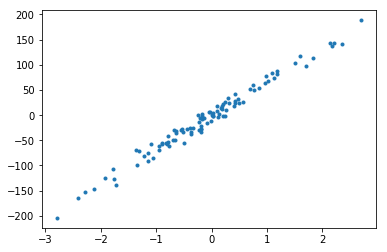

In [25]:
from sklearn.datasets import make_regression
n_features = 1
n_samples = 100

#dataset creation
X, y = make_regression(
n_samples=n_samples,
n_features=n_features,
noise=10)

fix, ax = plt.subplots()
ax.plot(X, y, '.')

In [26]:
# convert numpy arrays to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [27]:
from torch import nn
from torch import optim

class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
    
    def forward(self, X):
        return self.beta(X)

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = LinReg(n_features).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

X, y = X.to(device), y.to(device)

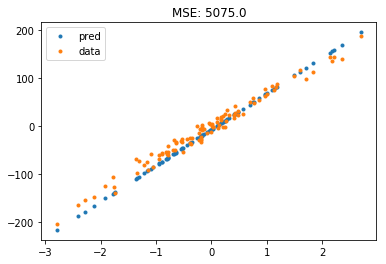

In [29]:
# for i in range(1,100):
# Train_step
model.train()  #train mode
optimizer.zero_grad()

y_ = model(X)
loss = criterion(y_, y)

loss.backward(loss)
optimizer.step()

#eval
model.eval() #evaluation mode

with torch.no_grad():
    y_ = model(X)


# Visualisation
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend()

In [30]:
model.beta

Linear(in_features=1, out_features=1, bias=True)

In [31]:
model.beta.weight

Parameter containing:
tensor([[75.0231]], requires_grad=True)

In [32]:
model.beta.weight.data

tensor([[75.0231]])

In [33]:
model.beta.bias

Parameter containing:
tensor([-6.7834], requires_grad=True)

# Debugging a NN

In [7]:
X = torch.rand((5,3))
X

tensor([[0.8622, 0.8856, 0.4256],
        [0.5588, 0.1607, 0.4750],
        [0.4803, 0.2914, 0.9939],
        [0.4249, 0.2766, 0.8073],
        [0.5816, 0.9031, 0.3715]])

In [9]:
from IPython.core.debugger import set_trace


class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(3,1)
    
    def forward(self, X):
        set_trace()
        x = self.lin(X)
        return x

model = MyModule()
y_  = model(X)

assert y_.shape == (5, 1), y_.shape

> <ipython-input-9-5296cf034f89>(11)forward()
      9     def forward(self, X):
     10         set_trace()
---> 11         x = self.lin(X)
     12         return x
     13 

ipdb> locals()
{'X': tensor([[0.8622, 0.8856, 0.4256],
        [0.5588, 0.1607, 0.4750],
        [0.4803, 0.2914, 0.9939],
        [0.4249, 0.2766, 0.8073],
        [0.5816, 0.9031, 0.3715]]), 'self': MyModule(
  (lin): Linear(in_features=3, out_features=1, bias=True)
)}
ipdb> r
--Return--
tensor([[-0.2...ddmmBackward>)
> <ipython-input-9-5296cf034f89>(12)forward()
     10         set_trace()
     11         x = self.lin(X)
---> 12         return x
     13 
     14 model = MyModule()

ipdb> a
self = MyModule(
  (lin): Linear(in_features=3, out_features=1, bias=True)
)
X = tensor([[0.8622, 0.8856, 0.4256],
        [0.5588, 0.1607, 0.4750],
        [0.4803, 0.2914, 0.9939],
        [0.4249, 0.2766, 0.8073],
        [0.5816, 0.9031, 0.3715]])
ipdb> locals()
{'X': tensor([[0.8622, 0.8856, 0.4256],
        [0.5588, 0.1

BdbQuit: 

In [11]:
X

tensor([[0.8622, 0.8856, 0.4256],
        [0.5588, 0.1607, 0.4750],
        [0.4803, 0.2914, 0.9939],
        [0.4249, 0.2766, 0.8073],
        [0.5816, 0.9031, 0.3715]])

## More on Linear Regression

In [12]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot

import matplotlib.pyplot as plt

### Linear regression with numpy

In [13]:
X = np.random.random((5,3))
y = np.random.random(5)
X.shape, y.shape

((5, 3), (5,))

In [15]:
# Optimal parameter
XT = X.T
beta_ = mdot([inv(XT @ X), XT, y])
beta_

array([0.09048372, 0.54657891, 0.49800282])

In [17]:
XT = X.T

beta_ = inv(XT @ X) @ XT @ y
beta_

array([0.09048372, 0.54657891, 0.49800282])

In [18]:
# model f
def f(X, beta):
    return X @ beta

f(X, beta_)

array([0.57407927, 0.02366613, 0.86136825, 0.5898249 , 0.75483135])

### LinReg with PyTorch

In [20]:
import torch

In [21]:
X = torch.from_numpy(X)
y = torch.from_numpy(y)
X.shape, y.shape

(torch.Size([5, 3]), torch.Size([5]))

In [23]:
XT = X.t()
beta_ = (XT @ X).inverse() @ XT @ y
beta_

tensor([0.0905, 0.5466, 0.4980], dtype=torch.float64)

In [24]:
beta_.numpy() - beta_

tensor([0., 0., 0.], dtype=torch.float64)